In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from wordcloud import WordCloud
from matplotlib.pyplot import figure

In [ ]:
# pitchfork scores come from final_pitchfork_scrape.csv
# total_tracks comes from MATCHED_ALBUMS.csv
# album popularity comes from MATCHED_ALBUMS.csv
# record label comes from MATCHED_ALBUMS.csv
# num spotify followers comes from MATCHED_ARTISTS.csv
# artist popularity comes frmo MATCHED_ARTISTS.csv
# number of pitchfork reviews that the artist has 
# number of artists on the album 


final_pitchfork_scrape_data = pd.read_csv('final_pitchfork_scrape.csv')
albums_data = pd.read_csv('MATCHED_ALBUMS.csv')
artists_data = pd.read_csv('MATCHED_ARTISTS.csv')
features_data = pd.read_csv('MATCHED_FEATUREDS.csv')
tracks_data = pd.read_csv('MATCHED_TRACKS.csv')
matched_data = final_pitchfork_scrape_data.loc[final_pitchfork_scrape_data['pitchfork_id'].isin(albums_data.pitchfork_id)]
matched_data.describe()


FileNotFoundError: ignored

(array([4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 5.000e+00, 4.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 5.000e+00, 5.000e+00, 0.000e+00,
        1.000e+01, 0.000e+00, 1.700e+01, 6.000e+00, 8.000e+00, 1.000e+01,
        0.000e+00, 1.100e+01, 1.100e+01, 3.300e+01, 2.000e+01, 0.000e+00,
        3.300e+01, 1.100e+01, 4.500e+01, 1.900e+01, 0.000e+00, 3.300e+01,
        1.600e+01, 6.400e+01, 3.300e+01, 0.000e+00, 8.200e+01, 0.000e+00,
        4.200e+01, 3.400e+01, 4.800e+01, 9.600e+01, 0.000e+00, 1.550e+02,
        0.000e+00, 8.700e+01, 2.240e+02, 0.000e+00, 1.950e+02, 0.000e+00,
        9.900e+01, 2.810e+02, 0.000e+00, 3.800e+02, 0.000e+00, 2.260e+02,
        5.680e+02, 0.000e+00, 5.510e+02, 0.000e+00, 3.220e+02, 7.300e+02,
        0.000e+00, 1.118e+03, 0.000e+00, 5.350e+02, 1.255e+03, 0.000e+00,
        1.421e+03, 0.000e+00, 8.030e+02, 1.607e+03, 0.000e+00, 1.525e+03,
        0.000e+00, 5.100e+02, 8.020e+0

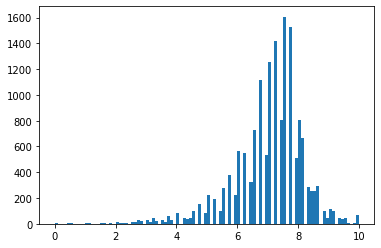

In [ ]:
plt.hist(matched_data['score'], bins=100)

(array([  16.,   31.,  117.,  255.,  550., 1422., 3872., 7214., 2730.,
         440.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

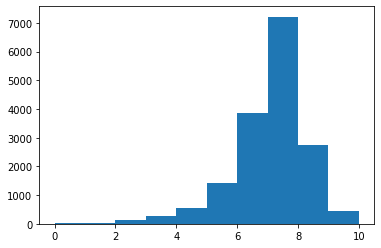

In [ ]:
plt.hist(matched_data['score'], bins=10)

In [ ]:
matched_d

In [ ]:
matched_data

NameError: ignored

(array([3853., 8313., 4481.]),
 array([ 0. ,  6.5,  7.8, 10. ]),
 <a list of 3 Patch objects>)

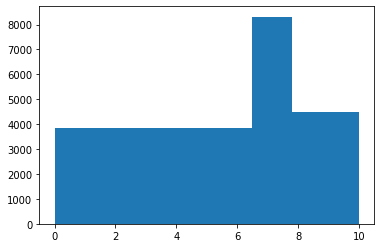

In [ ]:
plt.hist(matched_data['score'], bins=[0, 6.5, 7.8, 10])

(array([  16.,   31.,  117.,  255.,  550., 1422., 3872., 7214., 2730.,
         440.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

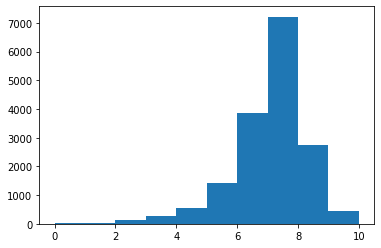

In [ ]:
plt.hist(matched_data['score'], )

In [ ]:
grouped = tracks_data.groupby('pitchfork_id')
df_min = grouped.agg('min')
df_max = grouped.agg('max')
df_mean = grouped.agg('mean')

#plt.figure(figsize=(15,10))
#plt.plot(df['acousticness'], matched_data['score'], 'ro')
#plt.ylabel('SCORE')
#plt.xlabel('ACOUSTICNESS MEAN')
#plt.show()

In [ ]:
df_min

,track_id,artist_id,artist_name,duration,explicit,name,track_number,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
pitchfork_id,,,,,,,,,,,,,,,,,,,,
0,09Qc2DddMbIMYFcHEW1PgD,4aMeIY7MkJoZg7O91cmDDd,Adrian Younge,7159,False,A Symphony for Sahara,1,0,0.015500,0.2580,0.18800,0.000000,0.0,0.0749,-22.123,0.0,0.0263,64.877,1.0,0.0763
2,0gQRcxQEpAoblY2zpMTqXd,1VX1sRrfeZCz2lpefE8gFo,Eve Adams,123618,False,A Walk in the Park,1,10,0.462000,0.2390,0.13400,0.000000,2.0,0.0637,-14.452,0.0,0.0275,77.741,1.0,0.0351
3,04puL91Qt7HSGbVrRnGVvC,0p4ViyfJUTW0IT4SCBLexf,Drakeo the Ruler,107755,False,10,1,33,0.003120,0.4190,0.28100,0.000000,0.0,0.0509,-9.796,0.0,0.0835,69.304,3.0,0.0719
5,01dOkipK3v7Sgo1HdxXpmf,3luuQQRuSBuDNnrkYvatnk,Sam Gendel,84644,False,06_Tape_Tiger,1,13,0.015800,0.0923,0.00402,0.000000,0.0,0.0677,-26.887,0.0,0.0290,59.069,1.0,0.0318
6,0Ea5bGaiRclWNl9iTc7wAy,37PL04N8kBWWW69jdrMMWT,Altin Gün,31669,False,Arda Boylari,1,24,0.030700,0.3640,0.23200,0.000019,0.0,0.0537,-10.861,0.0,0.0319,85.984,3.0,0.2290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22319,1QxHv0yRCu1zWiB7aVwGIz,4mtHSXwIHihO6MWNq5Qoko,Squarepusher,188266,False,Fly Street,1,8,0.005380,0.3100,0.53700,0.066400,1.0,0.0877,-15.410,0.0,0.0264,75.655,4.0,0.0680
22321,0fEV0F3QOzKlxO4CrLaKLJ,2QoU3awHVdcHS8LrZEKvSM,Wilco,22880,False,23 Seconds of Silence,1,2,0.000000,0.0000,0.00000,0.000000,0.0,0.0000,-60.000,0.0,0.0000,0.000,0.0,0.0000
22322,06ZyuKNXTq0MdW91RNY1Ig,3kbBWco9PZ5eSQsNScwG6U,Built To Spill,163533,False,Bad Light,1,34,0.000014,0.1800,0.51200,0.001310,2.0,0.0891,-7.311,0.0,0.0244,84.700,3.0,0.2090


In [ ]:
#plt.figure(figsize=(15,10))
#plt.plot(df['acousticness'], matched_data['score'], 'ro')
#plt.ylabel('SCORE')
#plt.xlabel('ACOUSTICNESS MEAN')
#plt.show()

In [ ]:
def get_season(row):
  month = row['month']
  if month == 1 or month == 2 or month == 12:
    return 1
  if month == 3 or month == 4 or month == 5:
    return 2
  if month == 6 or month == 7 or month == 8:
    return 3
  if month == 9 or month == 10 or month == 11:
    return 4  

In [ ]:
def get_quarter(row):
  month = row['month']
  if month >= 1 and month <= 3:
    return 1
  if month >= 4 and month <= 6:
    return 2
  if month >= 7 and month <= 9:
    return 3
  return 4 

In [ ]:
albums_w_labels = pd.merge(albums_data, final_pitchfork_scrape_data, on='pitchfork_id')
albums_w_labels = albums_w_labels.drop(labels='release_year', axis=1)
albums_w_labels = albums_w_labels.drop(labels='album_id', axis=1)
albums_w_labels = albums_w_labels.drop(labels='artist_id', axis=1)
albums_w_labels = albums_w_labels.drop(labels='popularity', axis=1)
albums_w_labels = albums_w_labels.drop(labels='track_ids', axis=1)
albums_w_labels = albums_w_labels.drop(labels='link', axis=1)
albums_w_labels = albums_w_labels.drop(labels='release_date_precision', axis=1)
albums_w_labels['bin_score'] = pd.cut(albums_w_labels['score'], 10)
albums_w_labels['bin_score_percentile'] = pd.cut(albums_w_labels['score'], bins=[0, 6.5, 7.8, 10])
albums_w_labels['month'] = pd.DatetimeIndex(albums_w_labels['release_date']).month
albums_w_labels['release_season'] = albums_w_labels.apply(lambda row: get_season(row), axis=1)
albums_w_labels['release_quarter'] = albums_w_labels.apply(lambda row: get_quarter(row), axis=1)
albums_w_labels
#df.apply (lambda row: label_race(row), axis=1)
#albums_w_labels['release_season'] = pd.cut(albums_w_labels['month'], bins=[])

,pitchfork_id,album_name,label,release_date,total_tracks,artist,album,score,bin_score,bin_score_percentile,month,release_season,release_quarter
0,0,The American Negro,Jazz Is Dead,2021-02-26,26,Adrian Younge,The American Negro,4.0,"(3.0, 4.0]","(0.0, 6.5]",2,1,1
1,2,Metal Bird,Eve Adams,2021-01-28,10,Eve Adams,Metal Bird,7.5,"(7.0, 8.0]","(6.5, 7.8]",1,1,1
2,3,The Truth Hurts,Stinc Team,2021-02-24,17,Drakeo the Ruler,The Truth Hurts,7.7,"(7.0, 8.0]","(6.5, 7.8]",2,1,1
3,5,Fresh Bread,Leaving Records,2021-02-26,52,Sam Gendel,Fresh Bread,6.5,"(6.0, 7.0]","(0.0, 6.5]",2,1,1
4,6,Yol,ATO Records,2021-02-26,12,Altin Gün,Yol,7.6,"(7.0, 8.0]","(6.5, 7.8]",2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16642,22319,Budakhan Mindphone,Warp Records,1999-03-01,7,Squarepusher,Budakhan Mindphone EP,7.5,"(7.0, 8.0]","(6.5, 7.8]",3,2,1
16643,22321,Summerteeth,Nonesuch,1999-03-08,17,Wilco,Summerteeth,9.4,"(9.0, 10.0]","(7.8, 10.0]",3,2,1
16644,22322,Keep It like a Secret,Warner Records,1999-01-22,10,Built to Spill,Keep It Like a Secret,9.3,"(9.0, 10.0]","(7.8, 10.0]",1,1,1
16645,22323,New World Record,Twelve Inch Records,1999-02-23,12,Poster Children,New World Record,8.1,"(8.0, 9.0]","(7.8, 10.0]",2,1,1


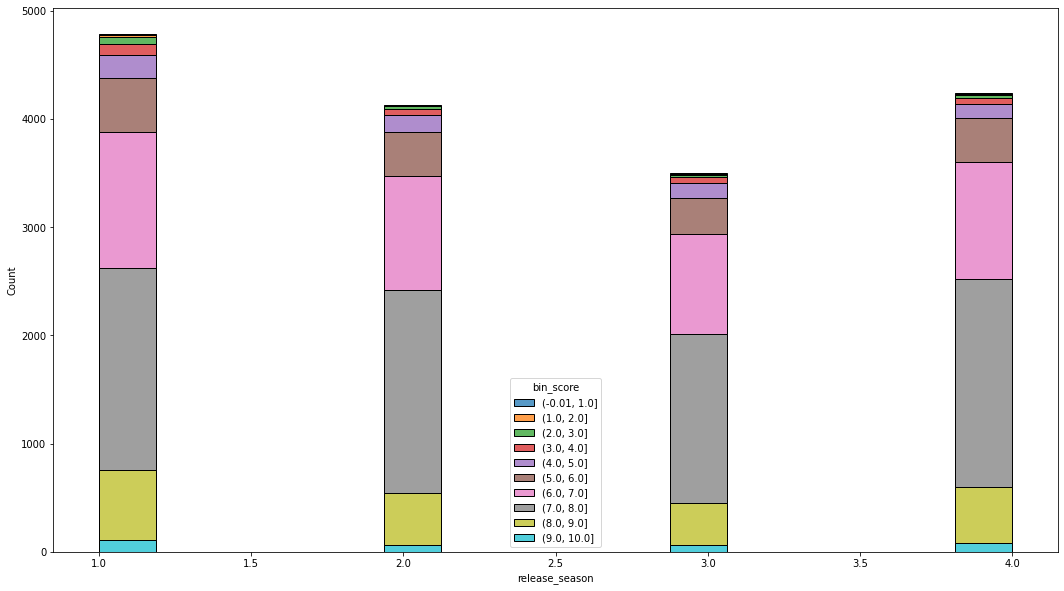

In [ ]:
# want to plot release season and score 
fig, ax = plt.subplots(figsize=(18,10))
sb.histplot(data=albums_w_labels, x='release_season', hue='bin_score', multiple='stack', ax=ax)
fig.show()

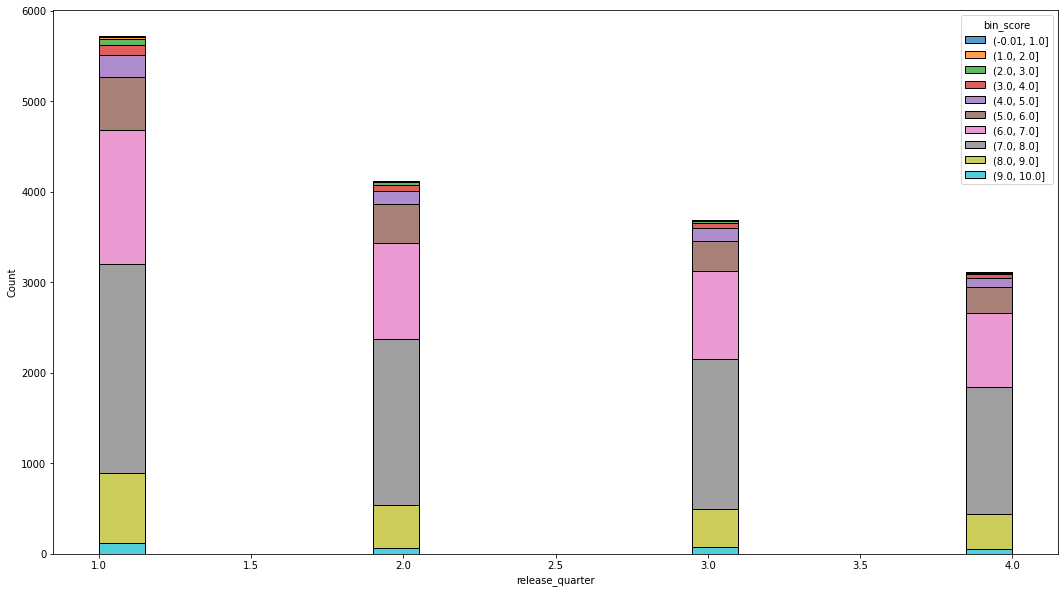

In [ ]:
fig, ax = plt.subplots(figsize=(18,10))
sb.histplot(data=albums_w_labels, x='release_quarter', hue='bin_score', multiple='stack', ax=ax)
fig.show()

In [ ]:
grouped_by_label = albums_w_labels.groupby('label').count()
grouped_by_label.describe()

,pitchfork_id,album_name,total_tracks,artist,album,score,bin_score,bin_score_percentile,bin_label_range,str_bin_label
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,4.137957,4.137957,4.137957,4.137957,4.137957,4.137957,4.137957,4.136962,4.137957,4.137957
std,13.751565,13.751565,13.751565,13.751565,13.751565,13.751565,13.751565,13.748772,13.751565,13.751565
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000


In [ ]:
grouped_by_label = albums_w_labels.groupby('label').count()
grouped_by_label['range'] = pd.cut(grouped_by_label.pitchfork_id, bins=[0, 1, 5, 10, 15, 20, 25, 50, 75, 100, 125, 150, 175, 200, 250, 300])
grouped_by_label.groupby('range')['pitchfork_id'].count().to_frame().reset_index()

,range,pitchfork_id
0,"(0, 1]",2411
1,"(1, 5]",1150
2,"(5, 10]",205
3,"(10, 15]",78
4,"(15, 20]",50
5,"(20, 25]",28
6,"(25, 50]",49
7,"(50, 75]",27
8,"(75, 100]",7
9,"(100, 125]",7


In [ ]:
# RECORD LABELS SORTED BY WHICH HAVE THE MOST... 
grouped = albums_data.groupby('label').count()
#grouped = pd.cut(grouped, bins=10).sort_values(ascending=False).to_frame()
grouped['range'] = pd.cut(grouped.pitchfork_id, bins=[0, 1, 5, 10, 15, 20, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 300])
grouped
#grouped['range'] = pd.qcut(grouped.pitchfork_id, q=8, duplicates='drop')
grouped.groupby('range')['pitchfork_id'].count().to_frame().reset_index()
# most labels have 1 through 5... 

# now we want to see how the scores match up for these different bins... 
# graph these different bins with their score distributions ... seaborn bar graph w stacks... scores come from final_pitchfork_scrape

#sb_data = sns.load_data(grouped)
#sb.histplot(data=ahh, x='range')

# bars are the ranges, stacks are the score distributions of the ranges





,range,pitchfork_id
0,"(0, 1]",2411
1,"(1, 5]",1150
2,"(5, 10]",205
3,"(10, 15]",78
4,"(15, 20]",50
5,"(20, 25]",28
6,"(25, 50]",49
7,"(50, 75]",27
8,"(75, 100]",7
9,"(100, 125]",7


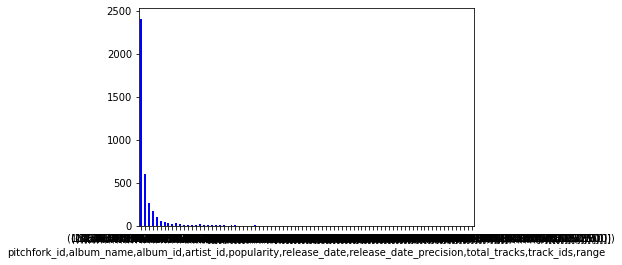

In [ ]:
ax = grouped.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
plt.show()

In [ ]:
albums_range = grouped['range']
albums_w_labels['bin_label_range'] = albums_w_labels['label'].map(albums_range)
albums_w_labels

,pitchfork_id,album_name,label,total_tracks,artist,album,score,bin_score,bin_score_percentile,bin_label_range
0,0,The American Negro,Jazz Is Dead,26,Adrian Younge,The American Negro,4.0,"(3.0, 4.0]","(0.0, 6.5]","(0, 1]"
1,2,Metal Bird,Eve Adams,10,Eve Adams,Metal Bird,7.5,"(7.0, 8.0]","(6.5, 7.8]","(0, 1]"
2,3,The Truth Hurts,Stinc Team,17,Drakeo the Ruler,The Truth Hurts,7.7,"(7.0, 8.0]","(6.5, 7.8]","(1, 5]"
3,5,Fresh Bread,Leaving Records,52,Sam Gendel,Fresh Bread,6.5,"(6.0, 7.0]","(0.0, 6.5]","(20, 25]"
4,6,Yol,ATO Records,12,Altin Gün,Yol,7.6,"(7.0, 8.0]","(6.5, 7.8]","(50, 75]"
...,...,...,...,...,...,...,...,...,...,...
16642,22319,Budakhan Mindphone,Warp Records,7,Squarepusher,Budakhan Mindphone EP,7.5,"(7.0, 8.0]","(6.5, 7.8]","(200, 225]"
16643,22321,Summerteeth,Nonesuch,17,Wilco,Summerteeth,9.4,"(9.0, 10.0]","(7.8, 10.0]","(50, 75]"
16644,22322,Keep It like a Secret,Warner Records,10,Built to Spill,Keep It Like a Secret,9.3,"(9.0, 10.0]","(7.8, 10.0]","(100, 125]"
16645,22323,New World Record,Twelve Inch Records,12,Poster Children,New World Record,8.1,"(8.0, 9.0]","(7.8, 10.0]","(1, 5]"


In [ ]:
grouped_by_label = albums_w_labels.groupby('bin_label_range').count()
grouped_by_label

,pitchfork_id,album_name,label,total_tracks,artist,album,score,bin_score,bin_score_percentile,str_bin_label
bin_label_range,,,,,,,,,,
"(0, 1]",2411,2411,2411,2411,2411,2411,2411,2411,2411,2411
"(1, 5]",3232,3232,3232,3232,3232,3232,3232,3232,3231,3232
"(5, 10]",1564,1564,1564,1564,1564,1564,1564,1564,1564,1564
"(10, 15]",986,986,986,986,986,986,986,986,986,986
"(15, 20]",881,881,881,881,881,881,881,881,881,881
"(20, 25]",642,642,642,642,642,642,642,642,642,642
"(25, 50]",1722,1722,1722,1722,1722,1722,1722,1722,1721,1722
"(50, 75]",1641,1641,1641,1641,1641,1641,1641,1641,1639,1641
"(75, 100]",627,627,627,627,627,627,627,627,627,627


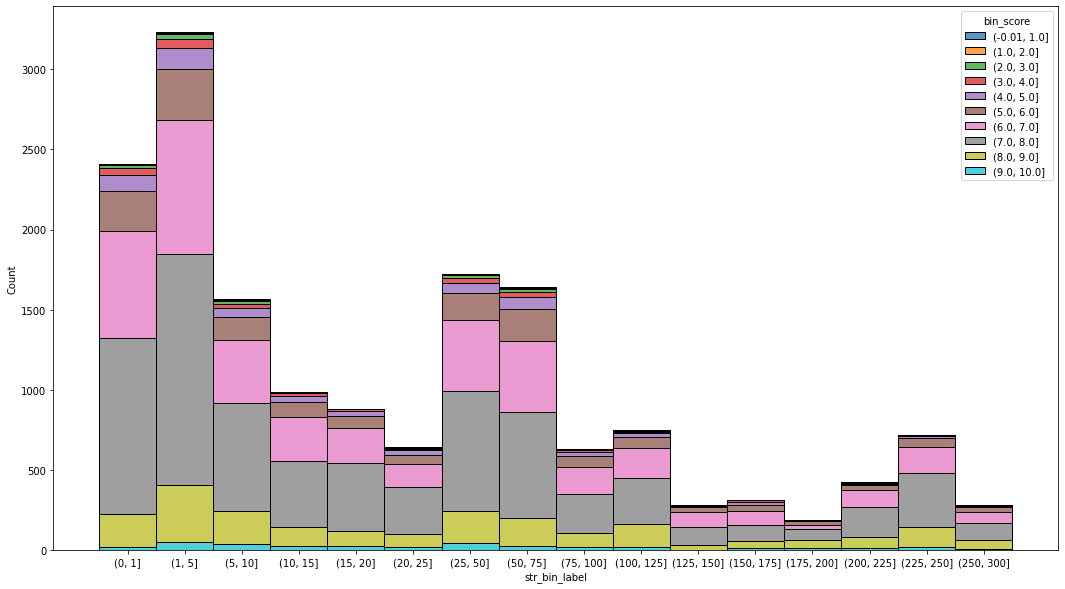

In [ ]:
albums_w_labels['str_bin_label'] = albums_w_labels['bin_label_range'].astype('str')
albums_w_labels = albums_w_labels.sort_values(by='bin_label_range')
fig, ax = plt.subplots(figsize=(18,10))
sb.histplot(data=albums_w_labels, x='str_bin_label', hue='bin_score', multiple='stack', ax=ax)
fig.show()

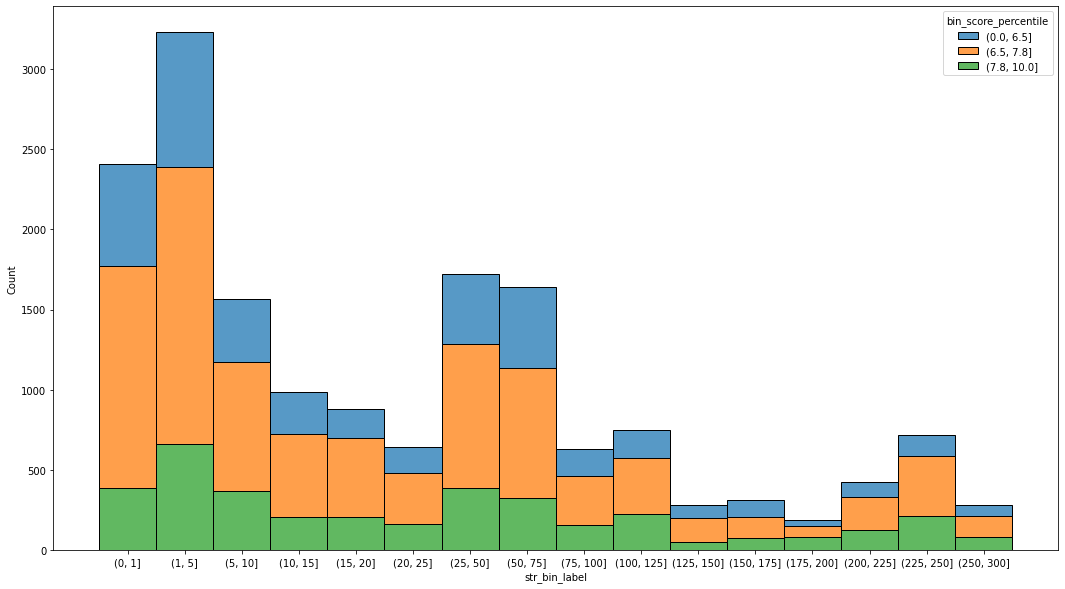

In [ ]:

fig, ax = plt.subplots(figsize=(18,10))
sb.histplot(data=albums_w_labels, x='str_bin_label', hue='bin_score_percentile', multiple='stack', ax=ax)
fig.show()


In [ ]:
zero_thru_five = albums_w_labels[(albums_w_labels.str_bin_label == '(0, 1]') | (albums_w_labels.str_bin_label == '(1, 5]')]
tf_thru_sf = albums_w_labels[(albums_w_labels.str_bin_label == '(25, 50]') | (albums_w_labels.str_bin_label == '(50, 75]')]
too_thru_tfo = albums_w_labels[(albums_w_labels.str_bin_label == '(200, 225]') | (albums_w_labels.str_bin_label == '(225, 250]')| (albums_w_labels.str_bin_label == '(250, 300]')]
one = albums_w_labels[(albums_w_labels.str_bin_label == '(0, 1]')]
zero_thru_five.describe()

,pitchfork_id,total_tracks,score
count,5643.000000,5643.000000,5643.000000
mean,9921.550948,11.787170,6.980117
std,6625.068331,5.596047,1.180043
min,0.000000,2.000000,0.000000
25%,3821.500000,10.000000,6.500000
50%,9228.000000,11.000000,7.200000
75%,15588.000000,13.000000,7.700000
max,22323.000000,124.000000,10.000000


In [ ]:
tf_thru_sf.describe()

,pitchfork_id,total_tracks,score
count,3363.000000,3363.000000,3363.000000
mean,10820.839726,12.008921,6.974428
std,6177.354240,6.908248,1.274611
min,6.000000,2.000000,0.000000
25%,5661.500000,10.000000,6.400000
50%,10574.000000,11.000000,7.200000
75%,16041.000000,13.000000,7.800000
max,22321.000000,139.000000,10.000000


In [ ]:
too_thru_tfo.describe()

,pitchfork_id,total_tracks,score
count,1137.000000,1137.000000,1137.000000
mean,11393.526825,11.034301,7.305453
std,6118.661775,5.583053,0.999932
min,15.000000,2.000000,2.900000
25%,6623.000000,9.000000,6.800000
50%,11401.000000,10.000000,7.400000
75%,16327.000000,12.000000,8.000000
max,22319.000000,70.000000,10.000000


In [ ]:

print((one[one['bin_score_percentile'].astype('str') == '(0.0, 6.5]'].count() / one.count()).pitchfork_id)
print((one[one['bin_score_percentile'].astype('str') == '(6.5, 7.8]'].count() / one.count()).pitchfork_id)
print((one[one['bin_score_percentile'].astype('str') == '(7.8, 10.0]'].count() / one.count()).pitchfork_id)
print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
print((zero_thru_five[zero_thru_five['bin_score_percentile'].astype('str') == '(0.0, 6.5]'].count() / zero_thru_five.count()).pitchfork_id)
print((zero_thru_five[zero_thru_five['bin_score_percentile'].astype('str') == '(6.5, 7.8]'].count() / zero_thru_five.count()).pitchfork_id)
print((zero_thru_five[zero_thru_five['bin_score_percentile'].astype('str') == '(7.8, 10.0]'].count() / zero_thru_five.count()).pitchfork_id)
print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
print((tf_thru_sf[tf_thru_sf['bin_score_percentile'].astype('str') == '(0.0, 6.5]'].count() / tf_thru_sf.count()).pitchfork_id)
print((tf_thru_sf[tf_thru_sf['bin_score_percentile'].astype('str') == '(6.5, 7.8]'].count() / tf_thru_sf.count()).pitchfork_id)
print((tf_thru_sf[tf_thru_sf['bin_score_percentile'].astype('str') == '(7.8, 10.0]'].count() / tf_thru_sf.count()).pitchfork_id)
print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
print((too_thru_tfo[too_thru_tfo['bin_score_percentile'].astype('str') == '(0.0, 6.5]'].count() / too_thru_tfo.count()).pitchfork_id)
print((too_thru_tfo[too_thru_tfo['bin_score_percentile'].astype('str') == '(6.5, 7.8]'].count() / too_thru_tfo.count()).pitchfork_id)
print((too_thru_tfo[too_thru_tfo['bin_score_percentile'].astype('str') == '(7.8, 10.0]'].count() / too_thru_tfo.count()).pitchfork_id)

# significantly more good albums for more popular labels and significantly less bad albums 

# either hot encode (similar to previous genre convos) or assign values like 1-3 for example... 
# we can see that more popular labels perform better 
# want to create a visualization of the proportions of different types of scores 
# received by albums that come from labels that are at different levels of number of pitchfork reviewss




0.26627955205309
0.572791372874326
0.160929075072584
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
0.26244905192273615
0.5518341307814992
0.18553960659223817
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
0.27951234017246507
0.5087719298245614
0.21082366934284866
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
0.2073342736248237
0.5035260930888575
0.28913963328631875


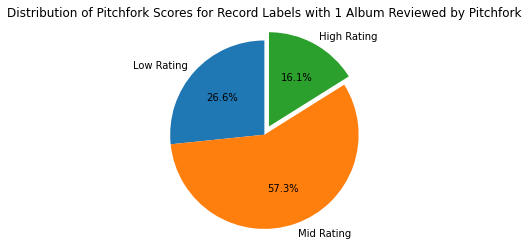

In [ ]:
labels = 'Low Rating', 'Mid Rating', 'High Rating'
sizes = [0.26627955205309, 0.572791372874326, 0.160929075072584]
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Pitchfork Scores for Record Labels with 1 Album Reviewed by Pitchfork')

plt.show()

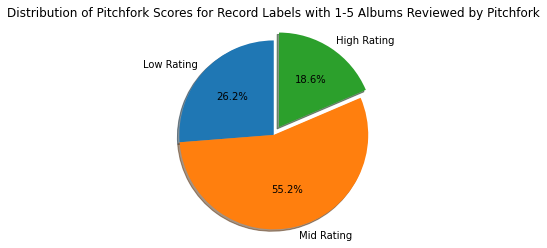

In [ ]:
labels = 'Low Rating', 'Mid Rating', 'High Rating'
sizes = [0.26244905192273615, 0.5518341307814992, 0.18553960659223817]
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Pitchfork Scores for Record Labels with 1-5 Albums Reviewed by Pitchfork')

plt.show()

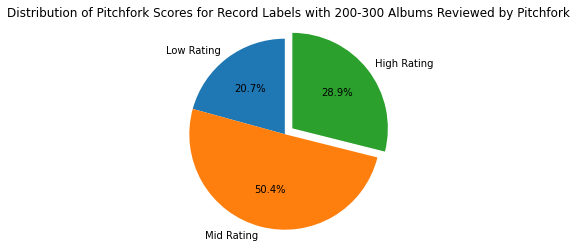

In [ ]:
labels = 'Low Rating', 'Mid Rating', 'High Rating'
sizes = [0.2073342736248237, 0.5035260930888575, 0.28913963328631875]
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Pitchfork Scores for Record Labels with 200-300 Albums Reviewed by Pitchfork')

plt.show()

In [ ]:
final_pitchfork_scrape_data.sample()

,pitchfork_id,artist,album,score,link,release_year
2569,2569,Ty Dolla $ign||Jeremih,MihTy,7.7,/reviews/albums/ty-dolla-dollarign-jeremih-mihty/,2018


In [ ]:
albums_data.describe()

,pitchfork_id,popularity,total_tracks
count,16647.000000,16647.000000,16647.000000
mean,10512.420436,28.200697,11.625518
std,6401.841945,19.902822,6.343815
min,0.000000,0.000000,2.000000
25%,4914.500000,11.000000,9.000000
50%,10197.000000,26.000000,11.000000
75%,15922.500000,41.000000,13.000000
max,22324.000000,97.000000,216.000000


In [ ]:
albums_data.mean().total_tracks

11.625518111371418

In [ ]:
albums_data.mean().popularity

28.200696822250254

In [ ]:
grouped = features_data.groupby(['pitchfork_id', 'artist_name'])
df = grouped.agg('mean')
df.describe()

,popularity,followers
count,32716.000000,3.271600e+04
mean,43.978696,1.245661e+06
std,25.503248,4.683027e+06
min,0.000000,0.000000e+00
25%,24.000000,2.652000e+03
50%,44.000000,3.438800e+04
75%,63.000000,3.921020e+05
max,100.000000,7.980963e+07


In [ ]:
mean_artist_followers = df.mean()
mean_artist_followers

popularity    4.397870e+01
followers     1.245661e+06
dtype: float64

In [ ]:
grouped = tracks_data.groupby('pitchfork_id')
df = grouped.agg('mean')
df.describe()

,duration,explicit,track_number,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1.664700e+04,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000
mean,2.590163e+05,0.105844,6.111591,15.733412,0.306781,0.484871,0.603072,0.313157,5.221118,0.197138,-9.344337,0.659840,0.086056,120.366844,3.862379,0.389291
std,1.328829e+05,0.281991,2.054485,14.876744,0.252788,0.148396,0.193171,0.291016,1.259515,0.087981,3.917360,0.204264,0.077732,13.153810,0.200114,0.172674
min,2.439988e+04,0.000000,1.000000,0.000000,0.000001,0.072720,0.000148,0.000000,0.000000,0.051875,-36.950889,0.000000,0.021525,61.848964,1.500000,0.017478
25%,1.989027e+05,0.000000,5.000000,3.277778,0.103170,0.382564,0.476714,0.047850,4.416667,0.139771,-11.292931,0.500000,0.040374,111.976672,3.777778,0.261399
50%,2.327669e+05,0.000000,6.000000,11.583333,0.239982,0.484636,0.624667,0.224294,5.235294,0.177050,-8.633833,0.666667,0.055667,120.382500,3.909091,0.390111
75%,2.781215e+05,0.000000,7.000000,24.514706,0.462324,0.588143,0.746437,0.552933,6.000000,0.230583,-6.616344,0.818182,0.094994,128.543725,4.000000,0.511725
max,3.511410e+06,1.000000,25.500000,79.000000,0.994000,0.899667,0.999000,0.991750,11.000000,0.948750,4.078000,1.000000,0.954750,181.434857,4.800000,0.917375


In [ ]:
grouped = features_data.groupby(['pitchfork_id', 'artist_name'])
df = grouped.agg('mean')
df = df.groupby('pitchfork_id').count()
df.describe()

,popularity,followers
count,16647.000000,16647.000000
mean,1.965279,1.965279
std,2.952261,2.952261
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,51.000000,51.000000


In [ ]:
albums_data_labels = pd.merge(albums_data, matched_data)
#albums_data_labels = albums_data_labels.groupby('label')
albums_data_labels['binned_score'] = pd.cut(albums_data_labels['score'], 10)



In [ ]:
albums_data_labels.describe()

,pitchfork_id,popularity,total_tracks,score
count,16647.000000,16647.000000,16647.000000,16647.000000
mean,10512.420436,28.200697,11.625518,7.046170
std,6401.841945,19.902822,6.343815,1.200156
min,0.000000,0.000000,2.000000,0.000000
25%,4914.500000,11.000000,9.000000,6.500000
50%,10197.000000,26.000000,11.000000,7.300000
75%,15922.500000,41.000000,13.000000,7.800000
max,22324.000000,97.000000,216.000000,10.000000


In [ ]:
 albums_data_labels.binned_score

0         (3.0, 4.0]
1         (7.0, 8.0]
2         (7.0, 8.0]
3         (6.0, 7.0]
4         (7.0, 8.0]
            ...     
16642     (7.0, 8.0]
16643    (9.0, 10.0]
16644    (9.0, 10.0]
16645     (8.0, 9.0]
16646     (7.0, 8.0]
Name: binned_score, Length: 16647, dtype: category
Categories (10, interval[float64]): [(-0.01, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0] < ... <
                                     (6.0, 7.0] < (7.0, 8.0] < (8.0, 9.0] < (9.0, 10.0]]

In [ ]:
 labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
 #want to grab all of the albums associated with the labels that have x number of reviews
 # want to aggregate their scores 

 albums_data_labels['score'].counts
 # want to find the counts of each binned score and divide by 16647
 sizes = [] / 16647 
 fig1, ax1 = plt.subplots()
 ax1.pie(sizes, labels=labels, autopct='%1.1%f', shadow=True, startangle=90)
 ax1.axis('equal')
 plt.show()

AttributeError: ignored

Helllo

**THE ABOVE CHART REPRESENTS THE MEAN/STD/ETC FOR THE NUMBER OF ARTISTS PER ALBUM**

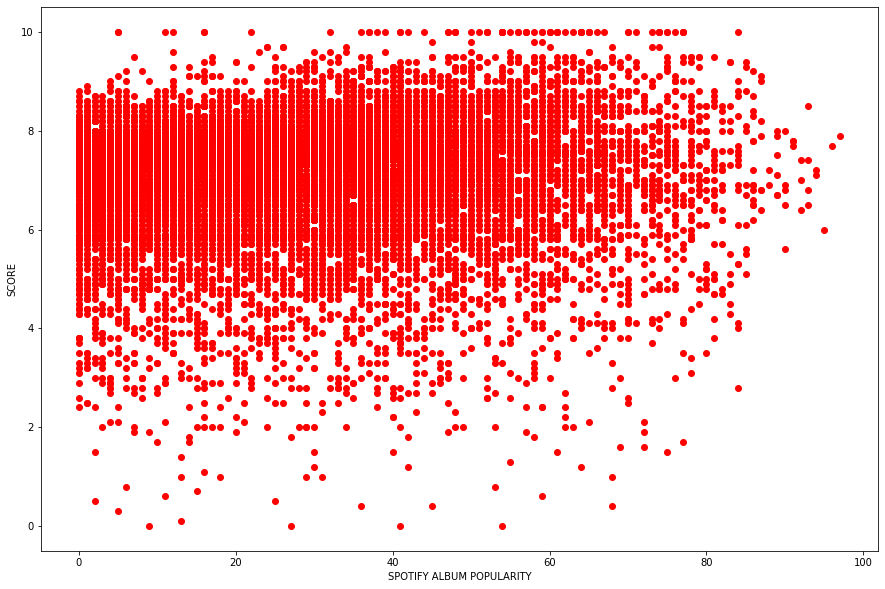

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(albums_data['popularity'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('SPOTIFY ALBUM POPULARITY')
plt.show()

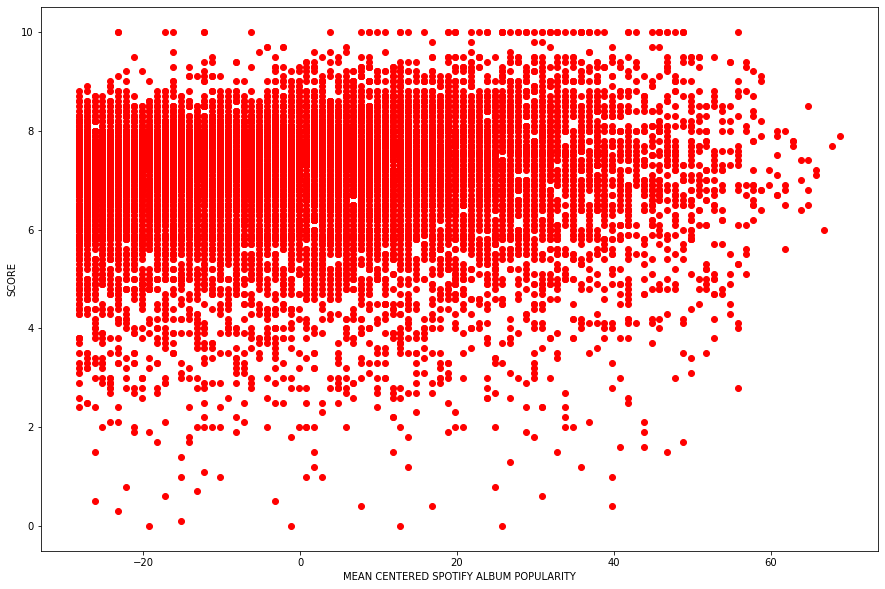

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(albums_data['popularity'] - albums_data.mean().popularity, matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('MEAN CENTERED SPOTIFY ALBUM POPULARITY')
plt.show()

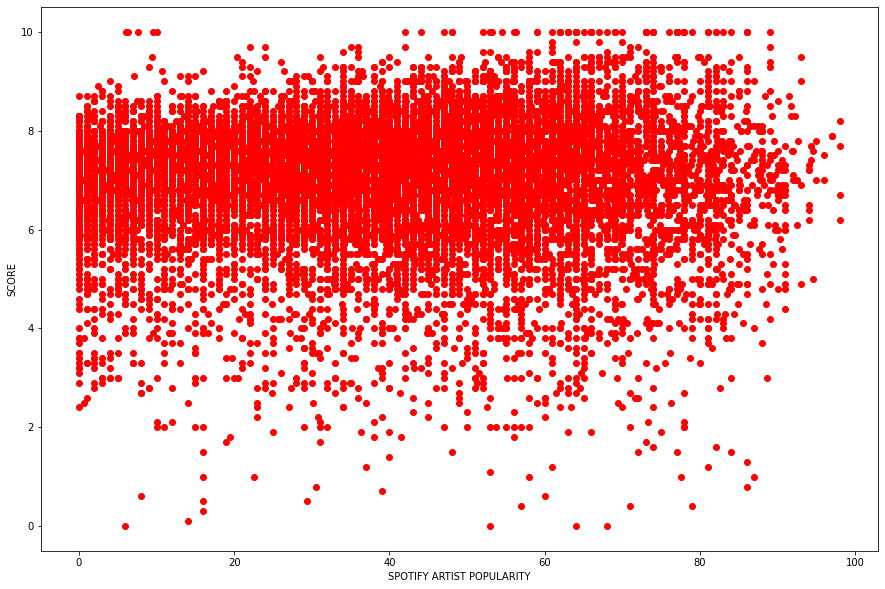

In [ ]:
# there are multiple artists per album...  combine them to average the popularity of the artists for each album?
# want to count the number of artists per album versus score
# consider album: jay-z w popularity 90 and kanye west w popularity 93 -- want the artist popularity to be (90 + 93) / 2
# use groupby to go through the featureds .... 

grouped = features_data.groupby(['pitchfork_id', 'artist_name'])
df = grouped.agg('mean')
groupedd = df.groupby('pitchfork_id')
means = groupedd.agg('mean')
plt.figure(figsize=(15,10))
#plt.plot(matched_data['score'], means['popularity'], 'ro')
plt.plot(means['popularity'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('SPOTIFY ARTIST POPULARITY')
plt.show()







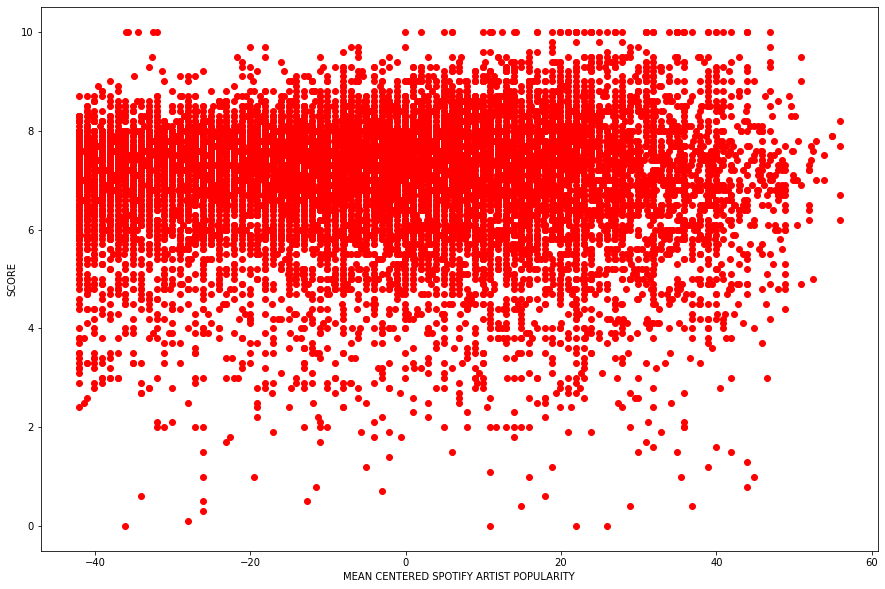

In [ ]:
grouped = features_data.groupby(['pitchfork_id', 'artist_name'])
df = grouped.agg('mean')
groupedd = df.groupby('pitchfork_id')
means = groupedd.agg('mean')
plt.figure(figsize=(15,10))
#plt.plot(matched_data['score'], means['popularity'], 'ro')
plt.plot(means['popularity'] - features_data.mean().popularity, matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('MEAN CENTERED SPOTIFY ARTIST POPULARITY')
plt.show()

62496273.0


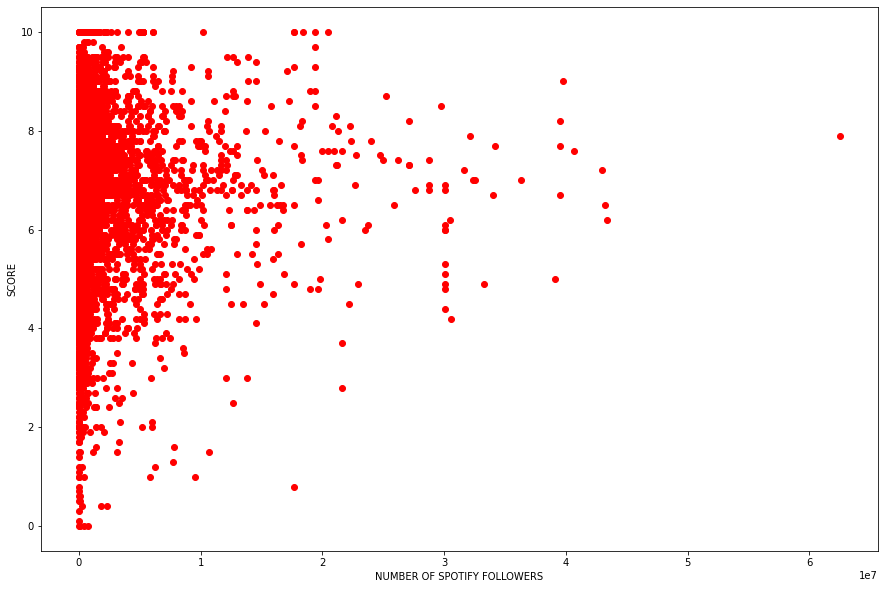

In [ ]:
grouped = features_data.groupby(['pitchfork_id', 'artist_name'])
df = grouped.agg('mean')
groupedd = df.groupby('pitchfork_id')
means = groupedd.agg('mean')
plt.figure(figsize=(15,10))
plt.plot(means['followers'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('NUMBER OF SPOTIFY FOLLOWERS')
plt.show()


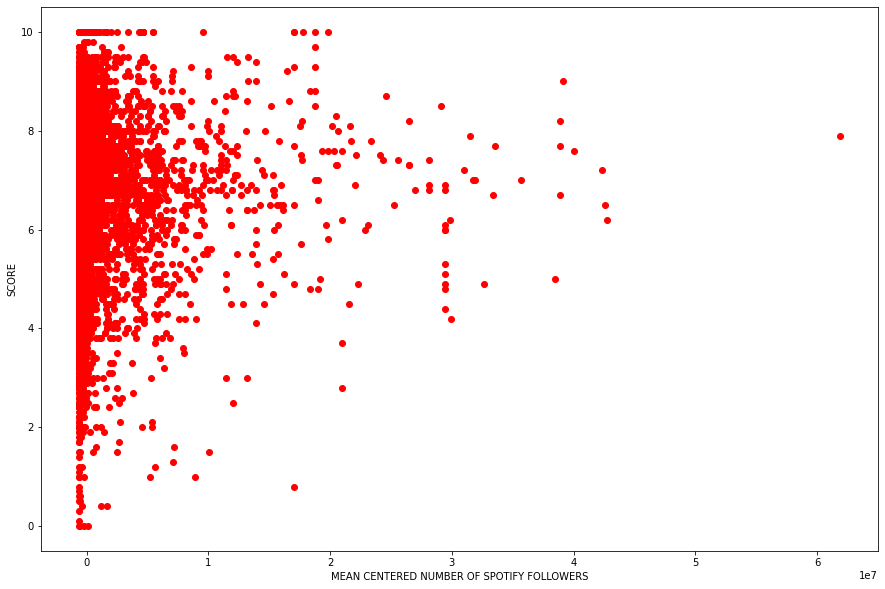

In [ ]:
# THIS DOESN'T WORK 
grouped = features_data.groupby(['pitchfork_id', 'artist_name'])
df = grouped.agg('mean')
groupedd = df.groupby('pitchfork_id')
means = groupedd.agg('mean')
plt.figure(figsize=(15,10))
plt.plot(means['followers'] - means['followers'].mean(), matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('MEAN CENTERED NUMBER OF SPOTIFY FOLLOWERS')
plt.show()

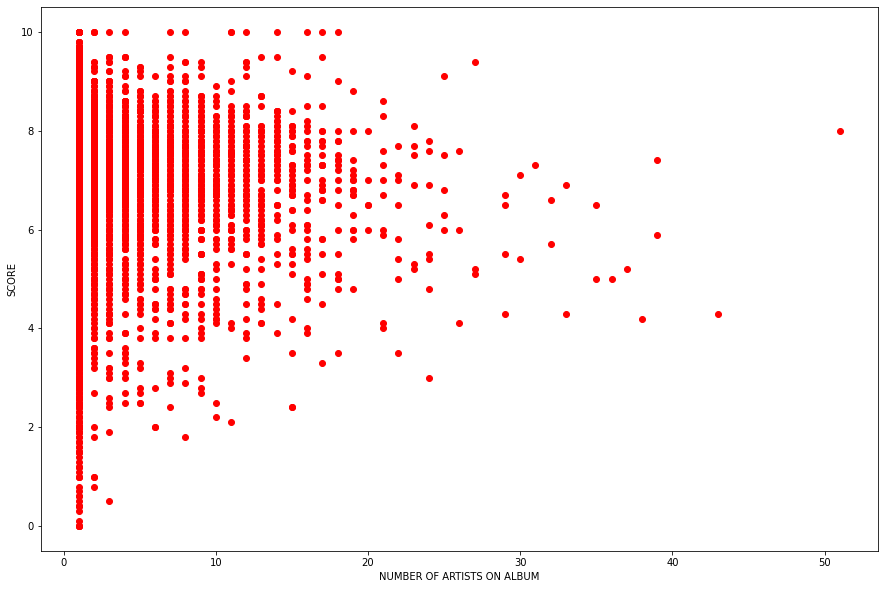

In [ ]:
grouped = features_data.groupby(['pitchfork_id', 'artist_name'])
df = grouped.agg('mean')
df = df.groupby('pitchfork_id').count()
plt.figure(figsize=(15,10))
plt.plot(df['followers'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('NUMBER OF ARTISTS ON ALBUM')
plt.show()


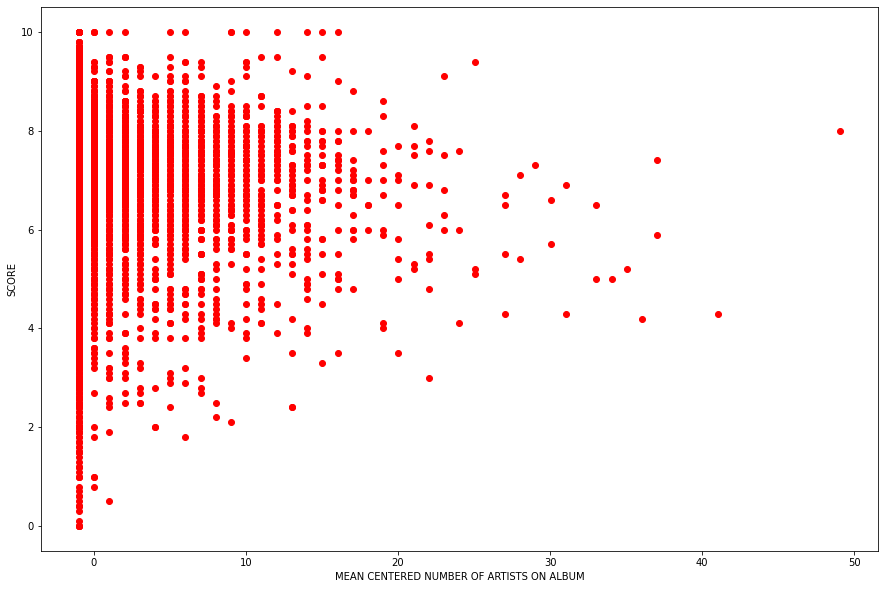

In [ ]:
grouped = features_data.groupby(['pitchfork_id', 'artist_name'])
df = grouped.agg('mean')
df = df.groupby('pitchfork_id').count()

plt.figure(figsize=(15,10))
plt.plot(df['followers'] - df['followers'].mean(), matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('MEAN CENTERED NUMBER OF ARTISTS ON ALBUM')
plt.show()


In [ ]:
plt.figure(figsize=(10, 15))
# ALBUM RELEASE DATE VERSUS ALBUM POPULARITY ON SPOTIFY
plt.plot(albums_data['ye'])

Text(0.5, 0, 'NUMBER OF TRACKS ON ALBUM')

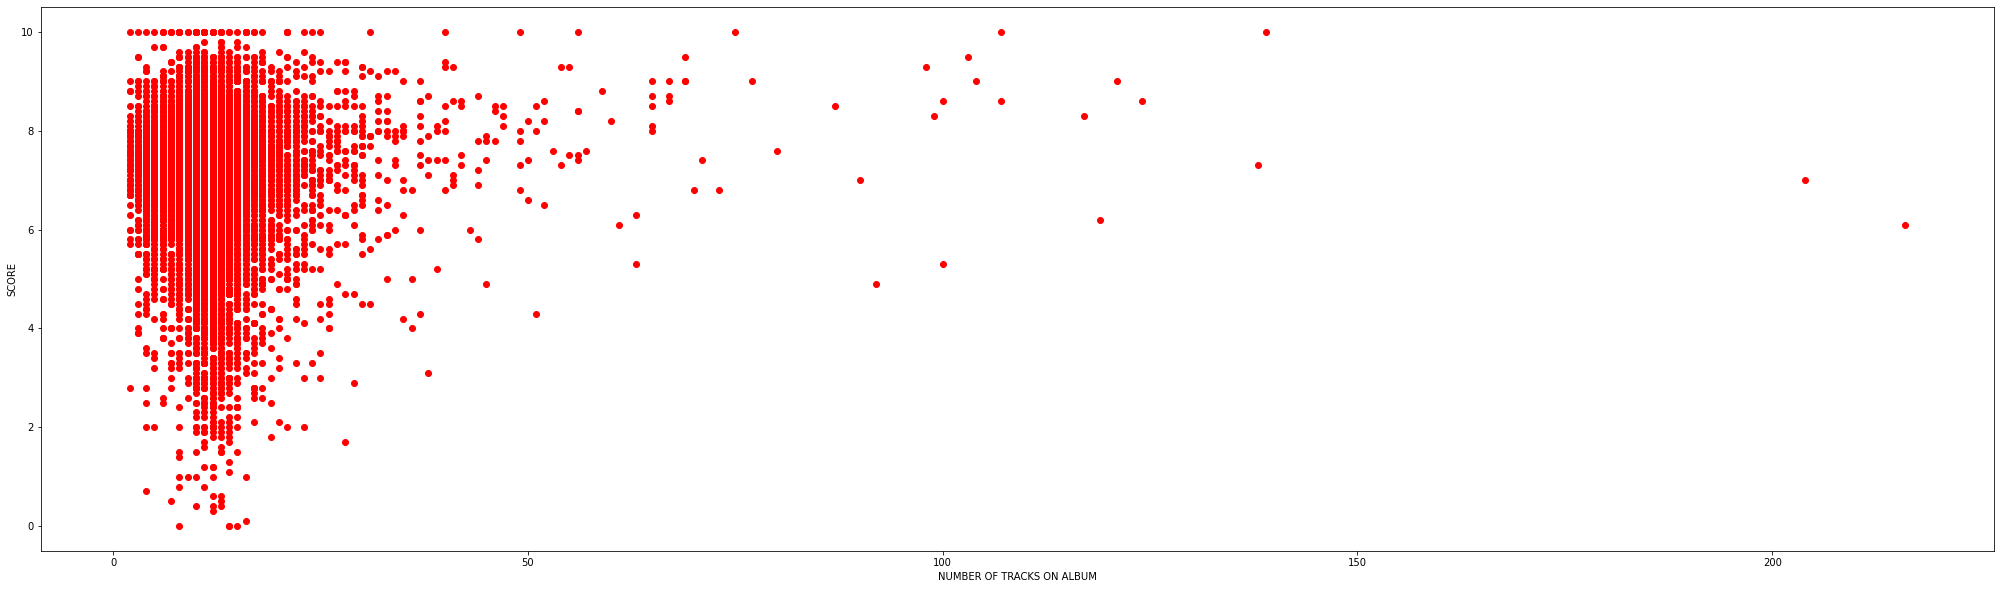

In [ ]:
plt.figure(figsize=(35,10))
plt.plot(albums_data['total_tracks'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('NUMBER OF TRACKS ON ALBUM')
#plt.show()


In [ ]:
albums_data.mean().total_tracks

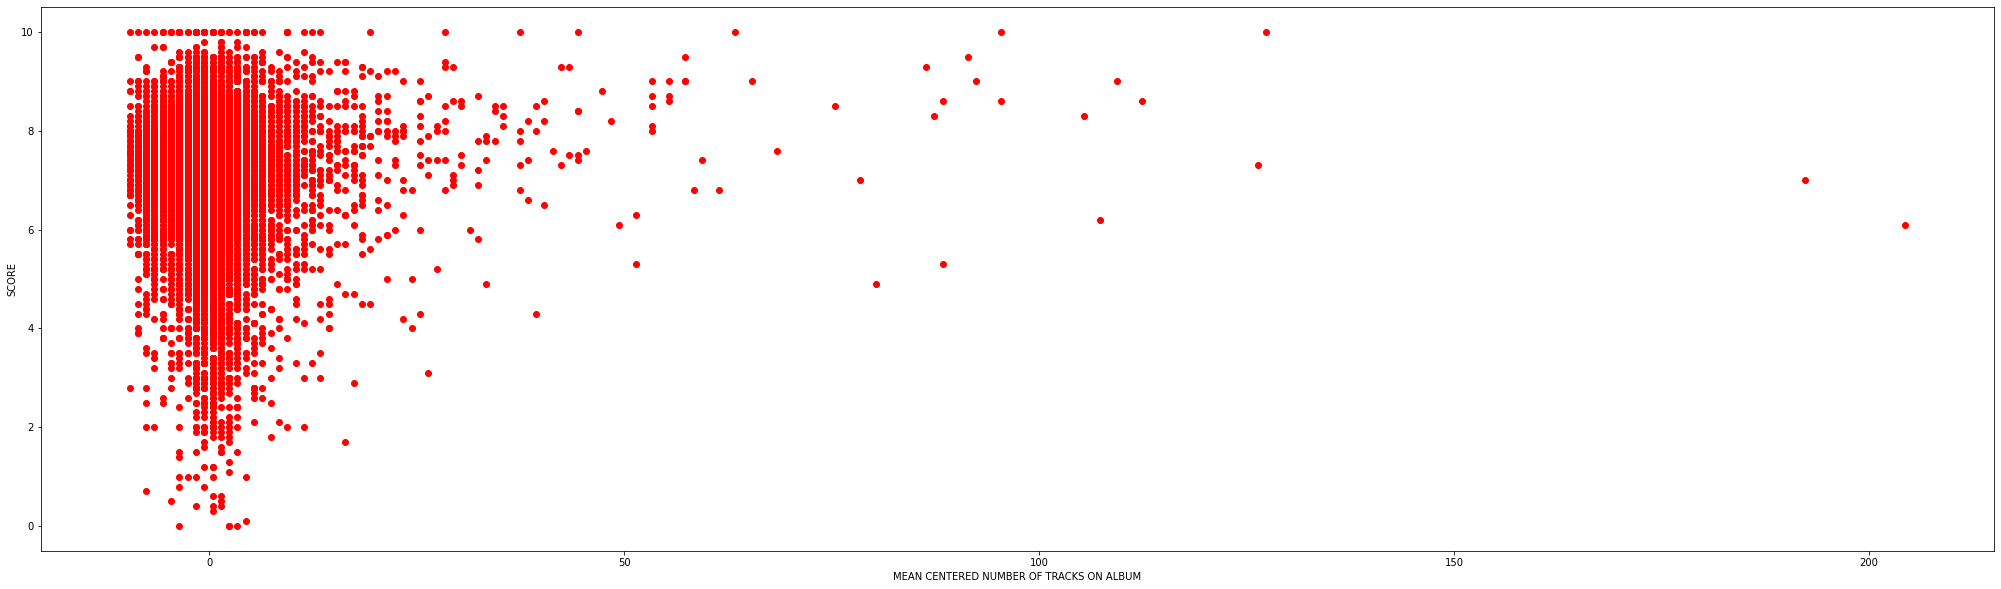

In [ ]:
# NOT WORKING??? 
plt.figure(figsize=(35,10))
plt.plot(albums_data['total_tracks'] - albums_data.mean().total_tracks, matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('MEAN CENTERED NUMBER OF TRACKS ON ALBUM')
plt.show()


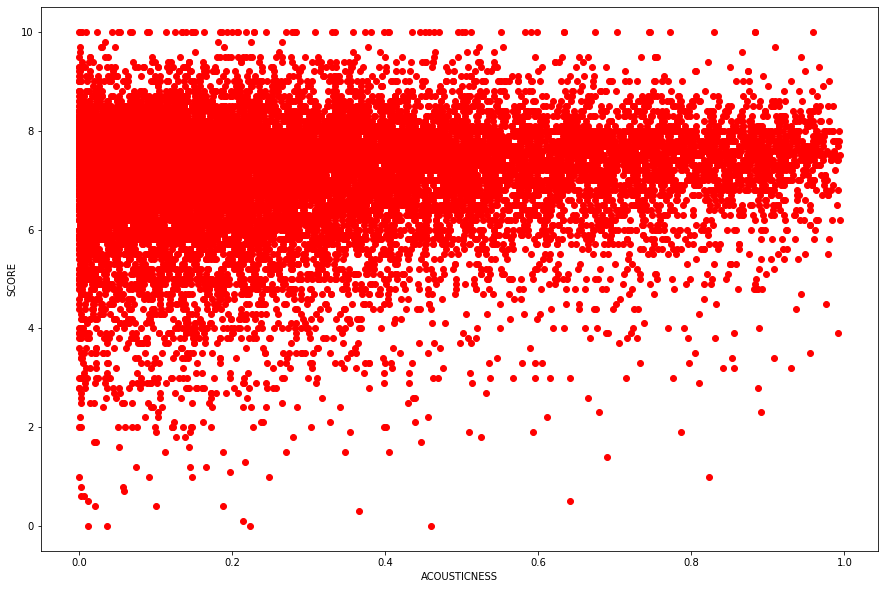

In [ ]:
grouped = tracks_data.groupby('pitchfork_id')
df = grouped.agg('mean')
plt.figure(figsize=(15,10))
plt.plot(df['acousticness'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('ACOUSTICNESS')
plt.show()

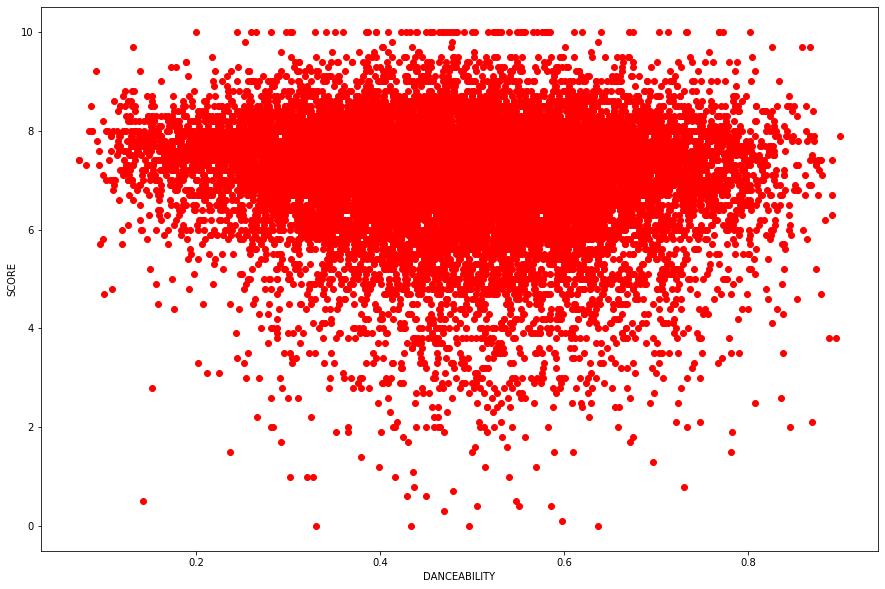

In [ ]:
grouped = tracks_data.groupby('pitchfork_id')
df = grouped.agg('mean')
plt.figure(figsize=(15,10))
plt.plot(df['danceability'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('DANCEABILITY')
plt.show()

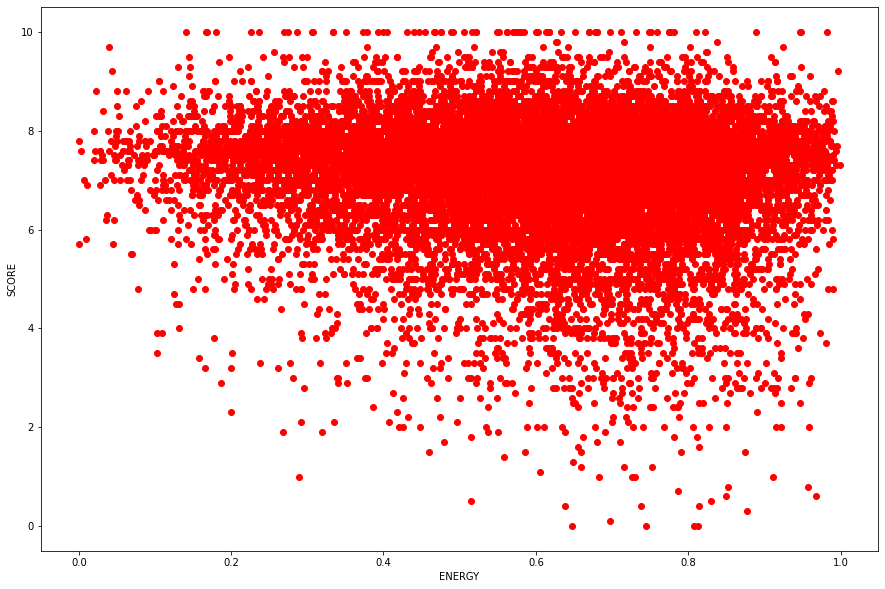

In [ ]:
grouped = tracks_data.groupby('pitchfork_id')
df = grouped.agg('mean')
plt.figure(figsize=(15,10))
plt.plot(df['energy'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('ENERGY')
plt.show()

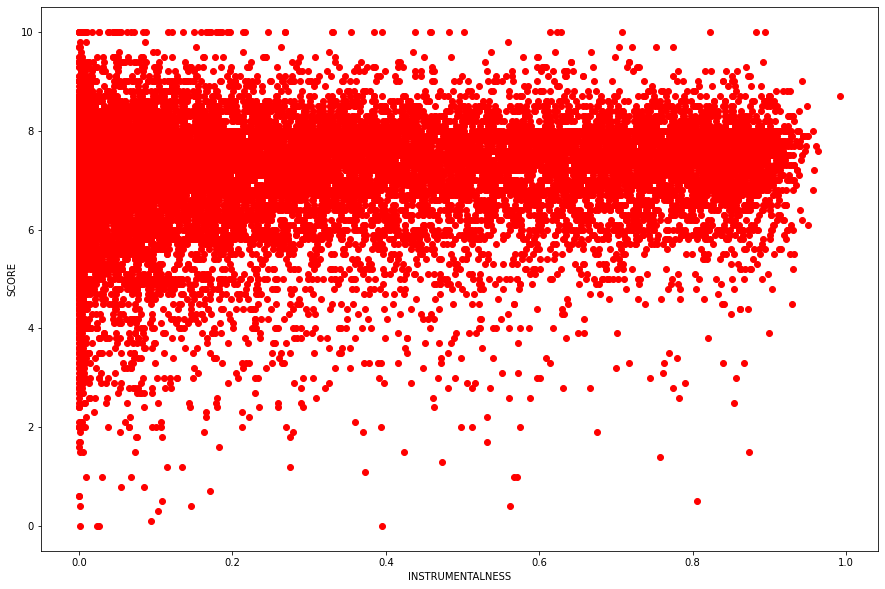

In [ ]:
grouped = tracks_data.groupby('pitchfork_id')
df = grouped.agg('mean')
plt.figure(figsize=(15,10))
plt.plot(df['instrumentalness'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('INSTRUMENTALNESS')
plt.show()

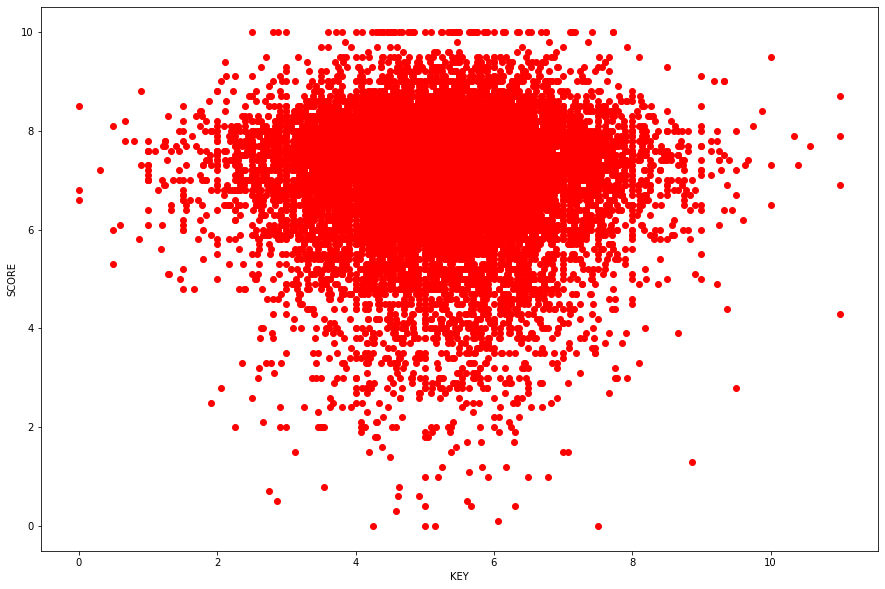

In [ ]:
grouped = tracks_data.groupby('pitchfork_id')
df = grouped.agg('mean')
plt.figure(figsize=(15,10))
plt.plot(df['key'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('KEY')
plt.show()

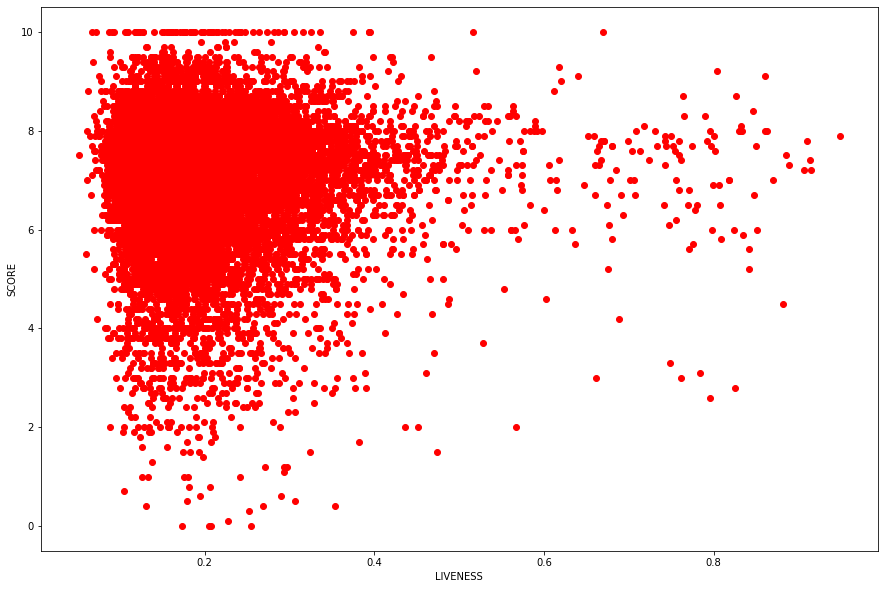

In [ ]:
grouped = tracks_data.groupby('pitchfork_id')
df = grouped.agg('mean')
plt.figure(figsize=(15,10))
plt.plot(df['liveness'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('LIVENESS')
plt.show()

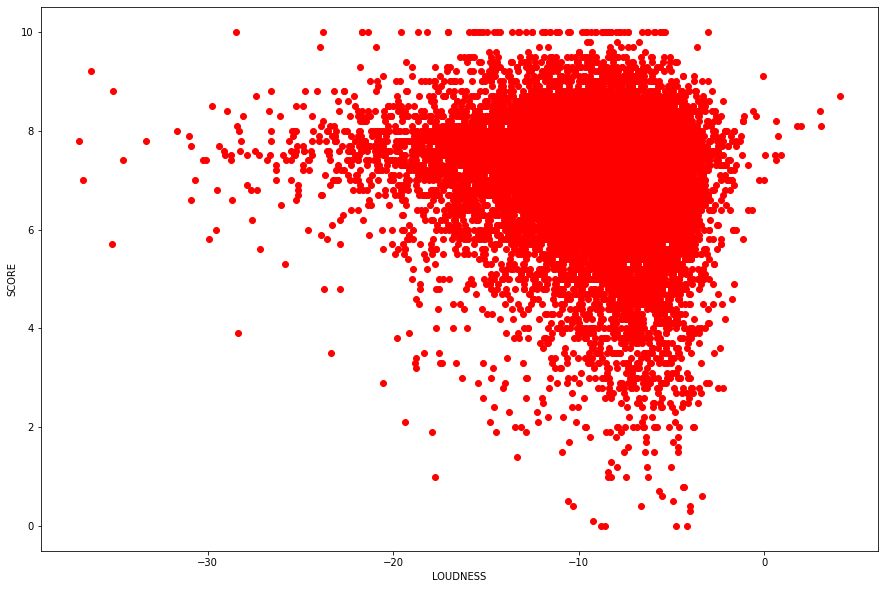

In [ ]:
grouped = tracks_data.groupby('pitchfork_id')
df = grouped.agg('mean')
plt.figure(figsize=(15,10))
plt.plot(df['loudness'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('LOUDNESS')
plt.show()

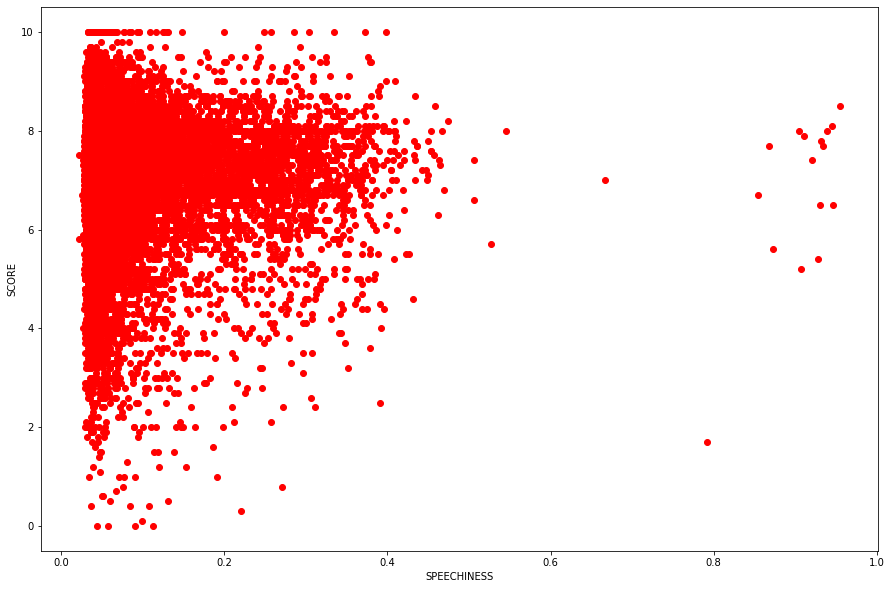

In [ ]:
grouped = tracks_data.groupby('pitchfork_id')
df = grouped.agg('mean')
plt.figure(figsize=(15,10))
plt.plot(df['speechiness'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('SPEECHINESS')
plt.show()

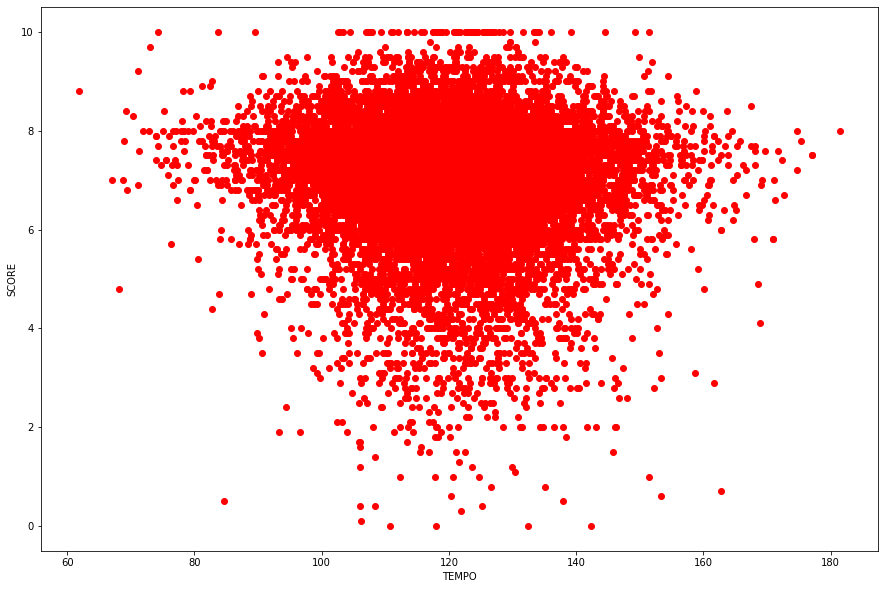

In [ ]:
grouped = tracks_data.groupby('pitchfork_id')
df = grouped.agg('mean')
plt.figure(figsize=(15,10))
plt.plot(df['tempo'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('TEMPO')
plt.show()

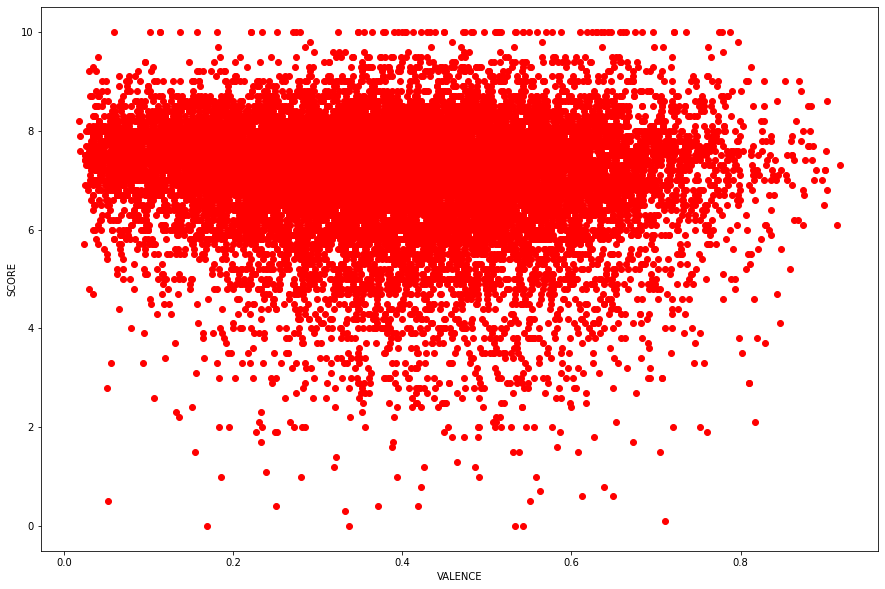

In [ ]:
grouped = tracks_data.groupby('pitchfork_id')
df = grouped.agg('mean')
plt.figure(figsize=(15,10))
plt.plot(df['valence'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('VALENCE')
plt.show()

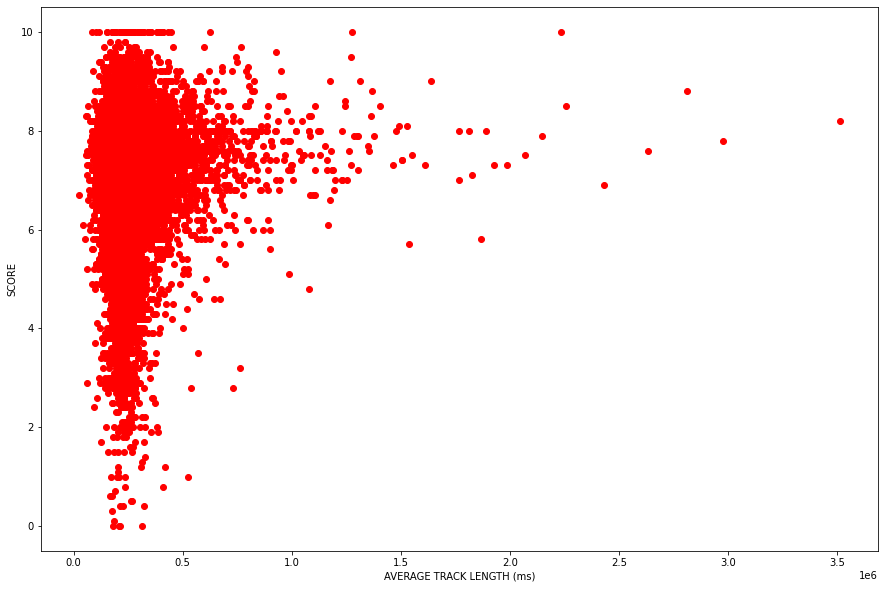

In [ ]:
grouped = tracks_data.groupby('pitchfork_id')
df = grouped.agg('mean')
plt.figure(figsize=(15,10))
plt.plot(df['duration'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('AVERAGE TRACK LENGTH (ms)')
plt.show()

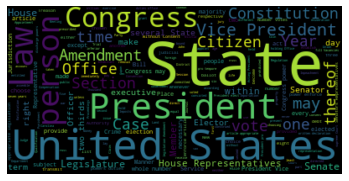

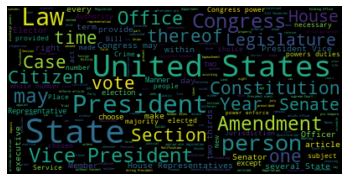

In [ ]:

# Read the whole text.
text = open('constitution.txt').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

In [ ]:
grouped = tracks_data.groupby('pitchfork_id')
df_min = grouped.agg('min').reset_index()
df_max = grouped.agg('max').reset_index()               
df_mean = grouped.agg('mean').reset_index()
df_diff = df_min
df_diff['pitchfork_id'] = df_min['pitchfork_id']
df_diff['acousticness'] = df_max['acousticness'] - df_min['acousticness']
df_diff['danceability'] = df_max['danceability'] - df_min['danceability']
df_diff['energy'] = df_max['energy'] - df_min['energy']
df_diff['instrumentalness'] = df_max['instrumentalness'] - df_min['instrumentalness']
df_diff['key'] = df_max['key'] - df_min['key']
df_diff['liveness'] = df_max['liveness'] - df_min['liveness']
df_diff['loudness'] = df_max['loudness'] - df_min['loudness']
df_diff['mode'] = df_max['mode'] - df_min['mode']
df_diff['speechiness'] = df_max['speechiness'] - df_min['speechiness']
df_diff['tempo'] = df_max['tempo'] - df_min['tempo']
df_diff['time_signature'] = df_max['time_signature'] - df_min['time_signature']
df_diff['valence'] = df_max['valence'] - df_min['valence']

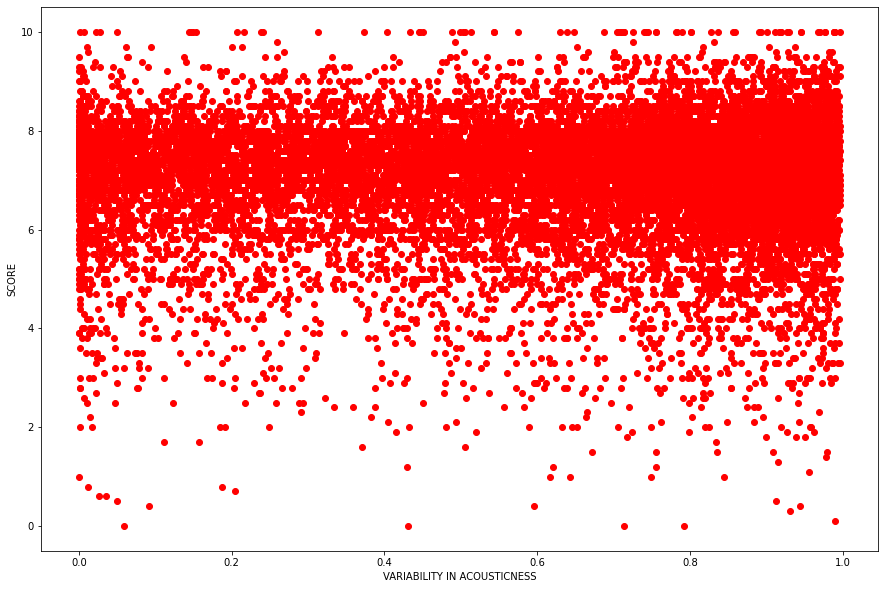

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df_diff['acousticness'], matched_data['score'], 'ro')
plt.ylabel('SCORE')
plt.xlabel('VARIABILITY IN ACOUSTICNESS')
plt.show()